In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("house_prices.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
sum(data.isnull().sum())

33

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

### Feature Transformation

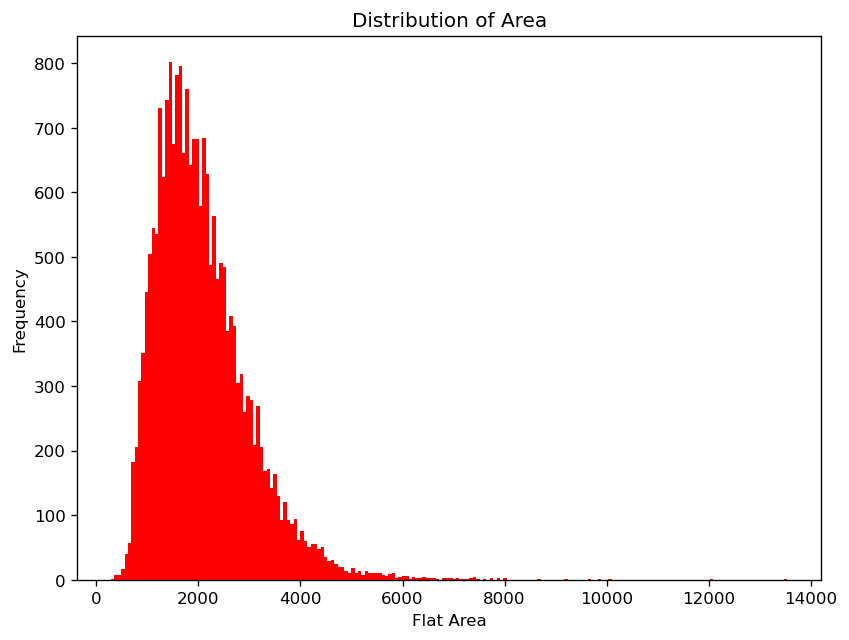

In [6]:
plt.figure(dpi=120,figsize=(8,6))

plt.hist(data['Flat Area (in Sqft)'],bins=200,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of Area")
plt.show()

Here we observe plot is in right skew in nature

In [7]:
def log_transform(sample_data):
    return np.log(sample_data)

In [8]:
data['Transform_Flat_Area']=data['Flat Area (in Sqft)'].map(log_transform)

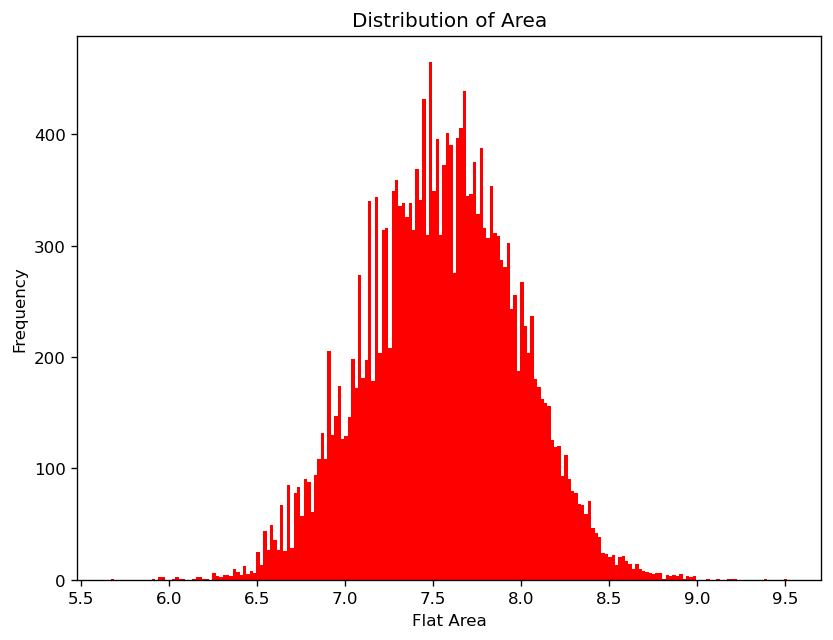

In [9]:
plt.figure(figsize=(8,6),dpi=120)

plt.hist(data['Transform_Flat_Area'],bins=200,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of Area")
plt.show()

### Label Encoding

In [10]:
label_encoded=data['Condition of the House']

label_encoded.value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [11]:
label_encoded=label_encoded.map({'Bad':1,
                                'Okay':2,
                                'Fair':3,
                                "Good":4,
                                'Excellent':5})

label_encoded.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

In [12]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [13]:
data['Condition of the House'].value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

### Binning of Sparse category


In [15]:
mean=[]

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House']==i].mean())

Text(0, 0.5, 'Sale Price')

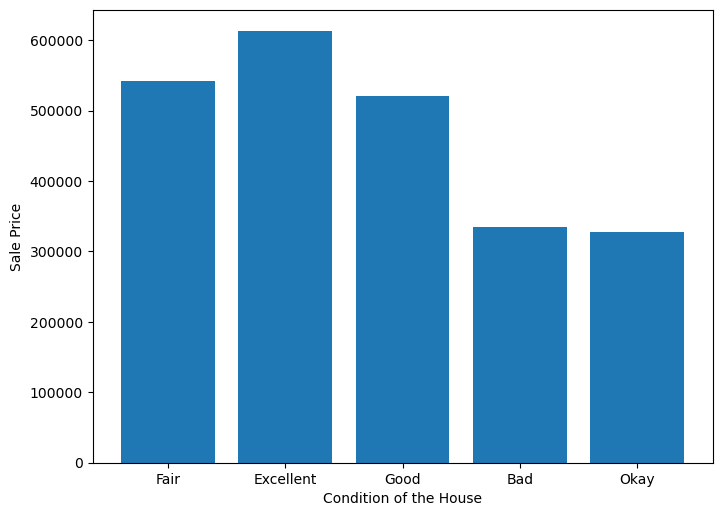

In [16]:
plt.figure(figsize=(8,6),dpi=100)

plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel("Sale Price")

Here we observe Fair and Good are similar & bad and okay also similar so here we use binning

In [17]:
mapping=({'Excellent':"Excellent",
         'Fair':'Good',
          'Good':'Good',
          'Okay':'Okay',
          'Bad':'Okay'
          })

In [20]:
data['Condition of the House']=data['Condition of the House'].map(mapping)
data['Condition of the House'].head()

0         Good
1         Good
2         Good
3    Excellent
4         Good
Name: Condition of the House, dtype: object

In [21]:
mean=[]

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House']==i].mean())

Text(0, 0.5, 'Sale Price')

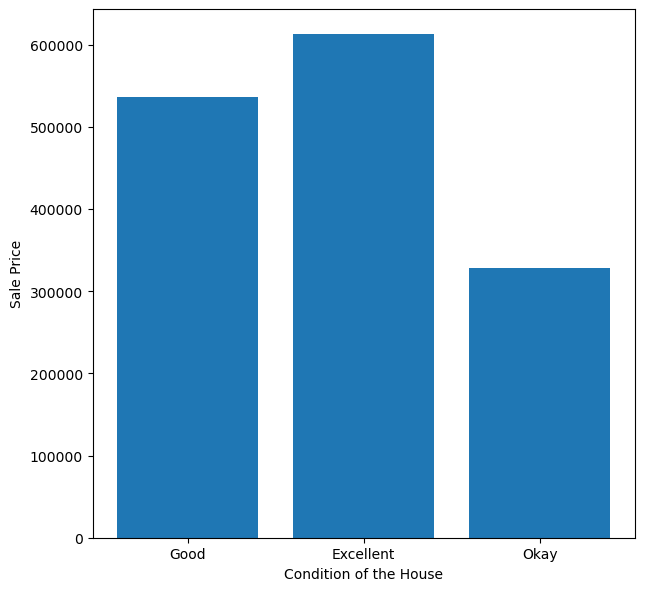

In [22]:
plt.figure(figsize=(7,7),dpi=100)

plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel("Sale Price")

### Binning of Continuous Variables

In [23]:
len(data['Age of House (in Years)'].unique())

116

In [24]:
data['Age of House (in Years)'].max()

118

In [25]:
data['Age of House (in Years)'].min()

3

In [26]:
def age_house(x):
    if x<10:
        x='new'
    elif 10 < x < 50:
        x='Old'
    else:
        x='Very Old'

    return x


In [27]:
cat_house_age=data['Age of House (in Years)'].map(age_house)
cat_house_age.unique()

array(['Very Old', 'Old', 'new'], dtype=object)

### Feature Generation

In [28]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [33]:
time=pd.DatetimeIndex(data['Date House was Sold'])
data['Year_Sold']=time.year
data['month_sold']=time.month
data['Weekday_Sold']=time.weekday
data['Date_sold']=time.days_in_month

data[['Year_Sold','month_sold','Weekday_Sold','Date_sold']].head()

,Year_Sold,month_sold,Weekday_Sold,Date_sold
0,2017,10,5,31
1,2017,12,3,31
2,2016,2,0,29
3,2017,12,3,31
4,2016,2,0,29
